In [53]:
# To Hndle The Data
import pandas as pd
import numpy as np

# To Visualize the data
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
%matplotlib inline

# To Hnadle Warnings during the execution of the code
import warnings
warnings.filterwarnings("ignore")


# Importing the dataset for analysis


In [ ]:
data =pd.read_csv("../data/raw/train.csv")
data.head(5)

# Exploratory Data Analysis

In [ ]:
# check the shape of the dataset i.e number of rows and columns
data.shape

In [ ]:
# exploratory data analysis, giving an overview of the dataset i.e the number of rows, columns, data types and non-null values
data.info()

In [ ]:
# listing the columns in the dataset
data.columns

In [ ]:
data.drop(columns=["Id"], inplace=True)

In [ ]:


# calculate the percentage of missing value per column in the dataset
missing_percentage = data.isnull().mean() * 100

# Optional: Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Print the result
print(missing_percentage.sort_values(ascending=False))


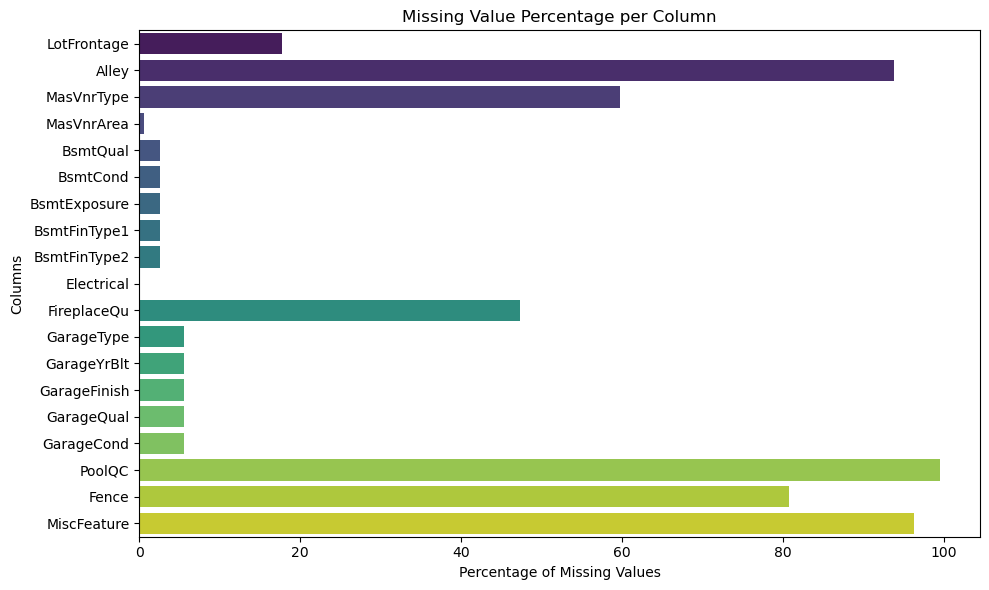

In [32]:
# visualizing the percentage of missing values per column
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="viridis")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Value Percentage per Column")
plt.tight_layout()
plt.show()

## observation from the above information
* - The dataset contains 81 columns and 1460 rows
* - There are 35 integers, 3 floats and 43 objects in the dataset
* - Columns ike MiscFeature,Fence,PoolQC,FireplaceQU, Alley, MasVnrType, LotFrontage, have high NAN percentage
* - Important numerical features like LotFrontage, GarageYrBlt, and MasVnrArea also contain some missing values.
* - Id is just a unique identifier and not useful for analysis.
* - Some columns have incorrect data types.
* - OverallQual, OverallCond are ordinal variables, but currently treated as integers.
* - MSSubClass represents building category, so it should be categorical, not integer

<h2>Analysing and cleaning  each columns of the dataset</h2>

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [40]:
skewness = data.select_dtypes(include="number").skew().sort_values(ascending=False)

<Figure size 1000x600 with 0 Axes>

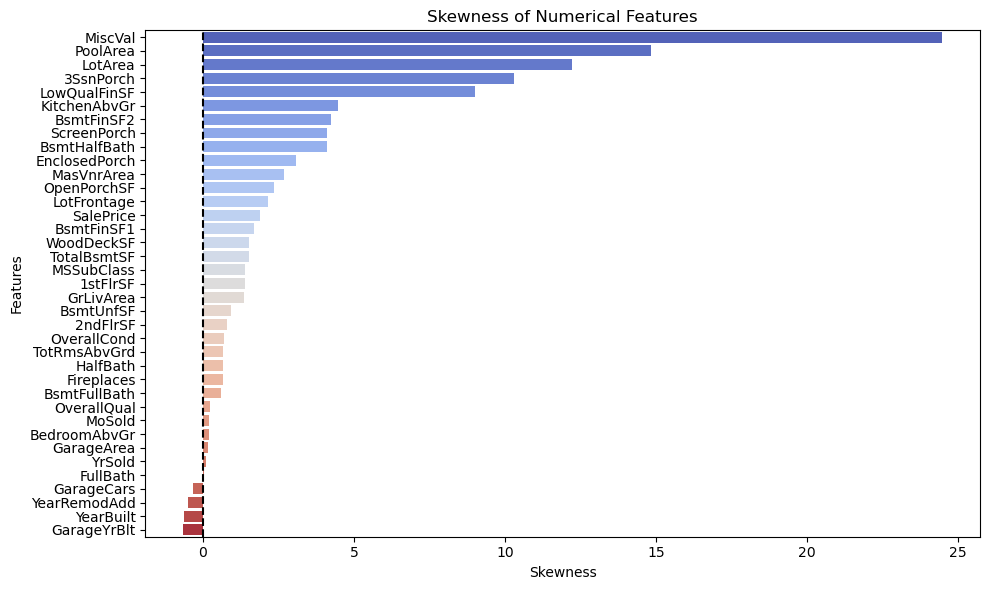

In [41]:
# visualizing the skewness of numerical features

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.values, y=skewness.index, palette='coolwarm')
plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness")
plt.ylabel("Features")
plt.axvline(x=0, color='black', linestyle='--')  # vertical line at 0 for reference
plt.tight_layout()
plt.show()

In [44]:
# Separate columns
# Categorical columns: object and category types
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns: int and float types
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Subset data
data_categorical = data[categorical_cols]
data_numerical = data[numerical_cols]


In [50]:
missing_categorical = data_categorical.isnull().sum()


print("Missing value in categorical columns: \n", missing_categorical[missing_categorical > 0])

Missing value in categorical columns: 
 Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [51]:
# Calculate total number of rows
total_rows = len(data_categorical)

# Compute percentage
missing_categorical_percent = (missing_categorical / total_rows) * 100

# Display result
print("Missing percentage in categorical columns:\n")
print(missing_categorical_percent.sort_values(ascending=False).round(2))

Missing percentage in categorical columns:

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
BsmtCond          2.53
Electrical        0.07
KitchenQual       0.00
CentralAir        0.00
Functional        0.00
HeatingQC         0.00
Heating           0.00
PavedDrive        0.00
SaleType          0.00
MSZoning          0.00
Street            0.00
Condition2        0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
Foundation        0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond    

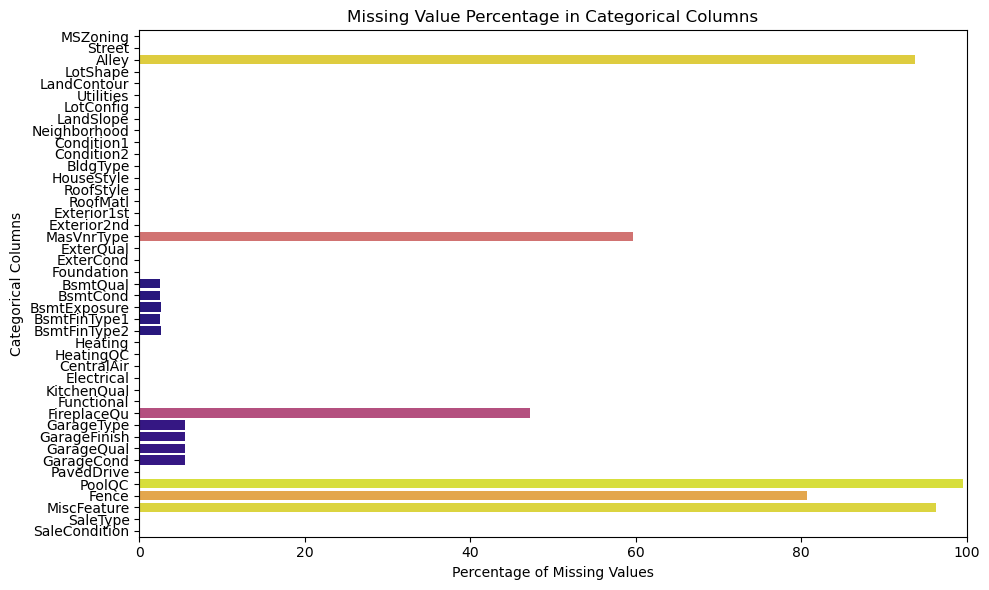

In [54]:
# Get a colormap and normalize values
cmap = get_cmap("plasma")  # You can change this to 'viridis', 'magma', etc.
norm = plt.Normalize(missing_categorical_percent.min(), missing_categorical_percent.max())
colors = [cmap(norm(val)) for val in missing_categorical_percent.values]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_categorical_percent.values,
    y=missing_categorical_percent.index,
    palette=colors  # Apply gradient colors
)

plt.xlabel("Percentage of Missing Values")
plt.ylabel("Categorical Columns")
plt.title("Missing Value Percentage in Categorical Columns")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [56]:
categorical_cols_to_drop = [
    "MiscFeature", "Fence", "PoolQC", "FireplaceQu", "Alley"
]

data.drop(columns=categorical_cols_to_drop, inplace=True)

In [57]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [58]:
def update_categorical_data(data):
    return data.select_dtypes(include=["object", "category"]).copy()

In [ ]:
data_categorical